In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Tạo data
people = ['Tom', 'Nick', 'Harry', 'Slim', 'Jim']
marks = [6,8,9,7,10]

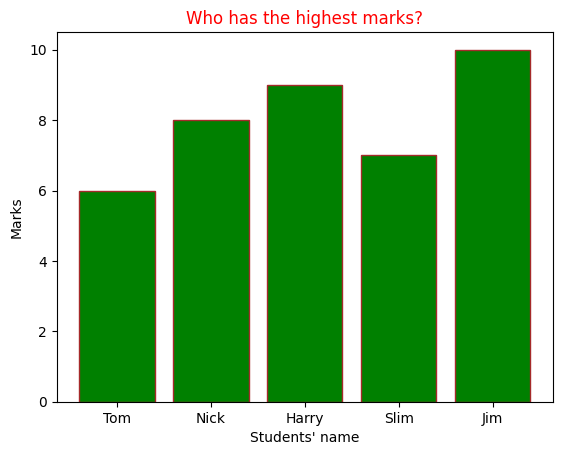

In [5]:
#Vertical bar chat (biểu đồ cột đứng thẳng)
plt.bar(people,marks, align='center',color='green', edgecolor='brown') #color là màu cột 
                                                                       #còn edgecolor là màu viền
                                                                    #align='center' thì chữ Tom, Nick,... sẽ nằm ngay chính giữa dưới cột
plt.xlabel("Students' name")
plt.ylabel('Marks')
plt.title('Who has the highest marks?', color='r')

plt.show()

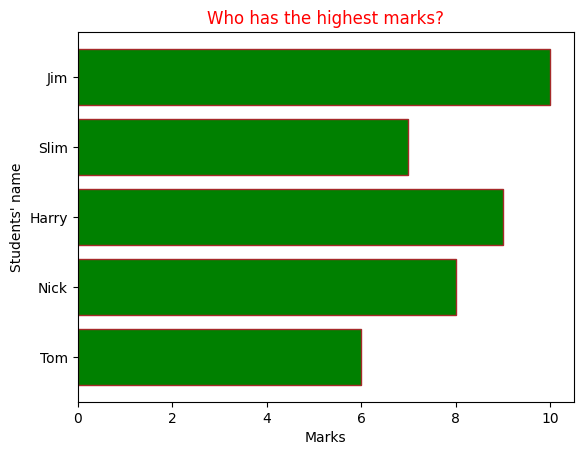

In [8]:
#Horizontal bar chat (biểu đồ cột nằm ngang)
plt.barh(y=people, width=marks, align='center',color='green', edgecolor='brown')

plt.xlabel("Marks")
plt.ylabel("Students' name")
plt.title('Who has the highest marks?', color='r')

plt.show()

In [9]:
#--------------------------Cột chồng nhau: STACKED BAR---------------------------------#

In [15]:
#Chuẩn bị data
labels = ['G1','G2','G3','G4','G5']
men_means = [20,35,30,35,27]
women_means = [25,32,34,20,25]

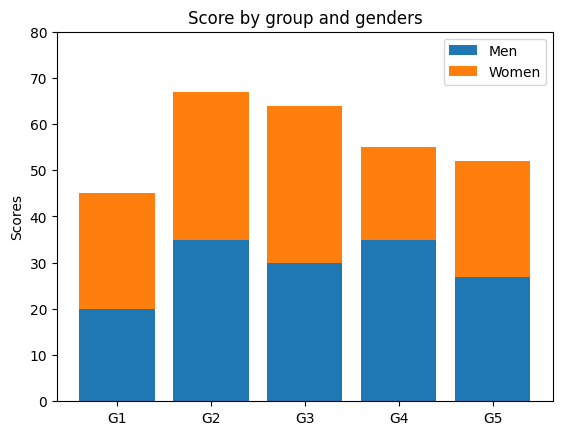

In [23]:
plt.bar(labels,men_means, label='Men')
plt.bar(labels,women_means, label='Women', bottom = men_means) #bottom = men_means ý muốn nói các cột men_means sẽ nằm dưới women_means

plt.yticks(np.arange(0,81,10)) #Giá trị trên trục y sẽ chạy từ 0 đến 80 (dưới 81), khoảng cách giữa các vạch là 10
plt.ylabel('Scores')
plt.title('Score by group and genders')
plt.legend()

plt.show()

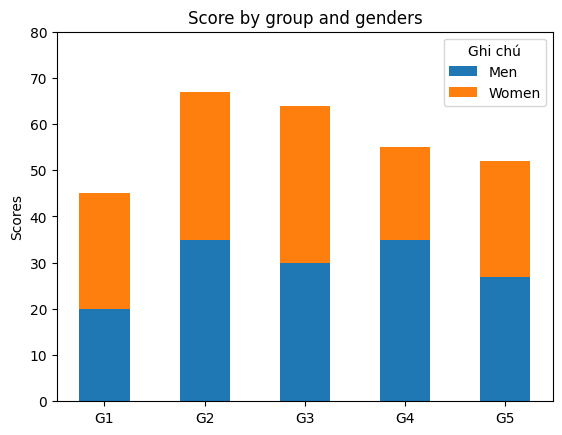

In [44]:
plt.bar(labels,men_means, width=0.5, label='Men')
plt.bar(labels,women_means, width=0.5, label='Women', bottom = men_means) #width = 0.5 tức độ rộng các cột là 0.5

plt.yticks(np.arange(0,81,10)) 
plt.ylabel('Scores')
plt.title('Score by group and genders')
plt.legend(title='Ghi chú')

plt.show()

In [26]:
#-------------------Vẽ hai biểu đồ  cột LIỀN nhau------------------#

In [27]:
labels = ['G1','G2','G3','G4','G5']
men_means = [20,35,30,35,27]
women_means = [25,32,34,20,25]

In [31]:
x = np.arange(len(labels)) #Tạo một series tên x, chứa các số  từ 0, 1, 2,..4 (len(labels)-1), đây sẽ là tập hợp toạ độ của các labels
w = 0.35 #Định sẵn độ rộng của các cột

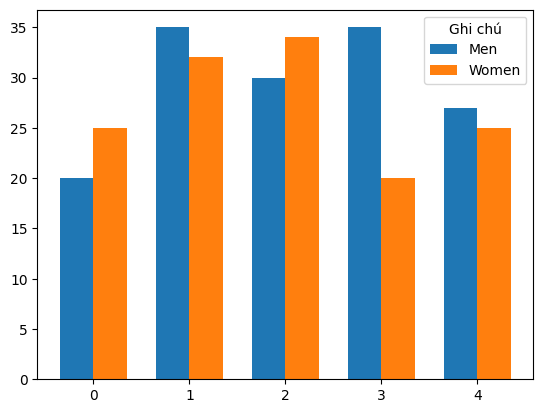

In [45]:
fig,ax = plt.subplots() #Tạo ra hai object, trong đó object đầu tiên là fig(figure), 
                        #object thứ hai là ax (axes) để  chứa thuộc tính các biểu đồ sẽ vẽ

ax.bar(x - w/2, men_means, width=w, label='Men')
ax.bar(x + w/2, women_means, width=w, label='Women')
#Vì độ rộng các cột được định sẵn là w=0.35 nên khi đặt toạ độ men_means là x-w/2 và women_means là x+w/2 thì hai cột sẽ nằm liền nhau
#  mặc dù chúng có chung một label là x

plt.legend(title='Ghi chú')
plt.show()

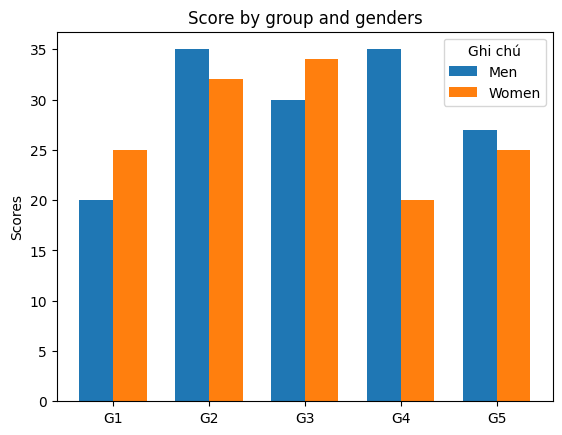

In [46]:
fig,ax = plt.subplots() #Tạo ra hai object, trong đó object đầu tiên là fig(figure), 
                        #object thứ hai là ax (axes) để  chứa thuộc tính các biểu đồ sẽ vẽ

ax.bar(x - w/2, men_means, width=w, label='Men')
ax.bar(x + w/2, women_means, width=w, label='Women')
#Vì độ rộng các cột được định sẵn là w=0.35 nên khi đặt toạ độ men_means là x-w/2 và women_means là x+w/2 thì hai cột sẽ nằm liền nhau
#  mặc dù chúng có chung một label là x

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels) #Đặt lại tên cho trục x
ax.set_title('Score by group and genders')

plt.legend(title='Ghi chú')
plt.show()

In [48]:
#----------------------------------Thử với dữ liệu wine_mag-------------------------#

In [51]:
wine_mag = pd.read_csv('winemag-data_first150k(27).csv', index_col=0)

In [52]:
wine_mag.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [53]:
wine_mag.shape

(150930, 10)

In [59]:
mean_ctry = wine_mag.groupby('country')['price'].mean().to_frame() #Tính đơn giá rượu trung bình theo từng nước, xuất kết quả ra dataframe

In [74]:
mean_ctry = mean_ctry.sort_values(by='price', ascending=False) #Xếp lại theo thứ tự giảm dần
mean_ctry_t10 = mean_ctry.head(10) #Chỉ lấy 10 nước cao nhất để vẽ
mean_ctry_t10

,price
country,
US-France,50.000000
England,47.500000
France,45.619885
Hungary,44.204348
Luxembourg,40.666667
Germany,39.011078
Italy,37.547913
Canada,34.628866
US,33.653808


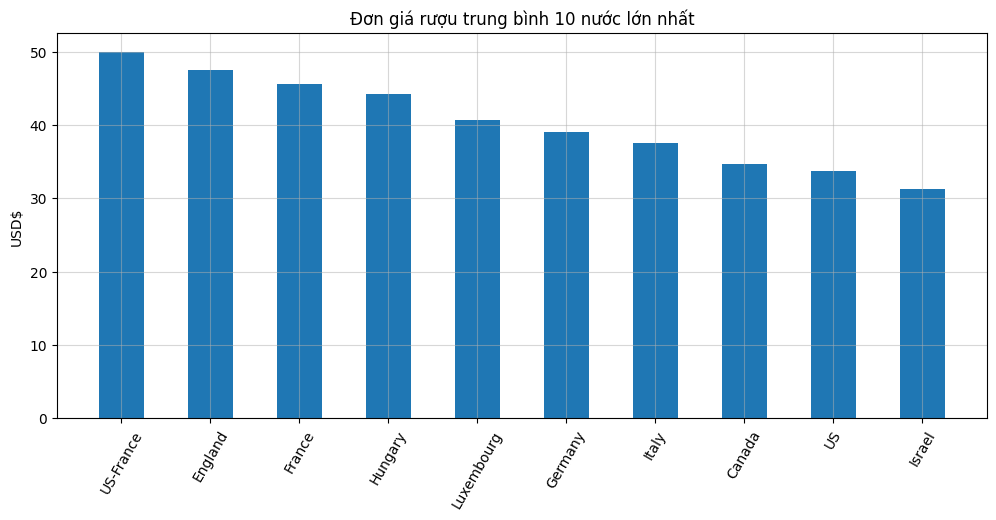

In [82]:
plt.figure(figsize=(12,5))

plt.bar(mean_ctry_t10.index, mean_ctry_t10.price, width=0.5)
plt.xticks(rotation=60) #Quay tên các nước 60 độ để cho dễ nhìn, tránh overlap
plt.ylabel('USD$')
plt.title('Đơn giá rượu trung bình 10 nước lớn nhất')
plt.grid(True, alpha=0.5)

plt.show()